In [3]:
# Importing Libraries


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [4]:
# importing Datasets


In [6]:
FIFA22 = pd.read_csv('../Datasets/players_22.csv')
FIFA22.shape

(19239, 110)

In [7]:
interesting_columns = ['short_name', 'age', 'nationality_name', 'overall', 'potential', 'club_name', 'value_eur', 'wage_eur', 'player_positions']
FIFA22 = pd.DataFrame(FIFA22, columns=interesting_columns)
FIFA22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   short_name        19239 non-null  object 
 1   age               19239 non-null  int64  
 2   nationality_name  19239 non-null  object 
 3   overall           19239 non-null  int64  
 4   potential         19239 non-null  int64  
 5   club_name         19178 non-null  object 
 6   value_eur         19165 non-null  float64
 7   wage_eur          19178 non-null  float64
 8   player_positions  19239 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 1.3+ MB


In [109]:
FIFA22[FIFA22['nationality_name']=="Argentina"]
# FIFA22[FIFA22['nationality_name']=="France"]

,short_name,age,nationality_name,overall,potential,club_name,Position,value_eur,wage_eur
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,RW,78000000.0,320000.0
30,S. Agüero,33,Argentina,87,87,FC Barcelona,ST,51000000.0,260000.0
33,Á. Di María,33,Argentina,87,87,Paris Saint-Germain,RW,49500000.0,160000.0
41,P. Dybala,27,Argentina,87,88,Juventus,CF,93000000.0,160000.0
69,A. Gómez,33,Argentina,85,85,Sevilla FC,CAM,33500000.0,51000.0
...,...,...,...,...,...,...,...,...,...
16449,F. Galván,21,Argentina,59,68,San Lorenzo de Almagro,ST,500000.0,2000.0
17549,M. Pochettino,20,Argentina,56,72,Watford,RM,375000.0,6000.0
18028,F. Torres,24,Argentina,55,58,Deportivo Cali,RM,170000.0,500.0
18034,G. Machado,20,Argentina,55,68,Cerro Largo Fútbol Club,CDM,300000.0,500.0


In [ ]:
# only 32 Teams in the 2022 world cup 


In [10]:
list_2022 = ['Qatar', 'Germany', 'Denmark', 'Brazil', 'France', 'Belgium', 'Croatia', 'Spain', 'Serbia', 'England', 'Switzerland', 'Netherlands', 'Argentina', 'IR Iran', 'Korea Republic', 'Japan', 'Saudi Arabia', 'Ecuador', 'Uruguay', 'Canada', 'Ghana', 'Senegal', 'Portugal', 'Poland', 'Tunisia', 'Morocco', 'Cameroon', 'USA', 'Mexico', 'Wales', 'Australia', 'Costa Rica']
FIFA22['Position'] = FIFA22['player_positions'].str.split(",").str[0]
FIFA22 = FIFA22[["short_name", "age", "nationality_name", 'overall', 'potential', "club_name", "Position", "value_eur", "wage_eur"]]
FIFA22 = FIFA22[(FIFA22["nationality_name"].apply(lambda x: x in list_2022))]
FIFA22['nationality_name'].unique()

array(['Argentina', 'Poland', 'Portugal', 'Brazil', 'Belgium', 'France',
       'Germany', 'England', 'Korea Republic', 'Netherlands', 'Senegal',
       'Spain', 'Uruguay', 'Costa Rica', 'Croatia', 'Denmark',
       'Switzerland', 'Serbia', 'Morocco', 'Mexico', 'Cameroon', 'Ghana',
       'Wales', 'USA', 'Canada', 'Japan', 'Ecuador', 'IR Iran',
       'Australia', 'Tunisia', 'Saudi Arabia'], dtype=object)

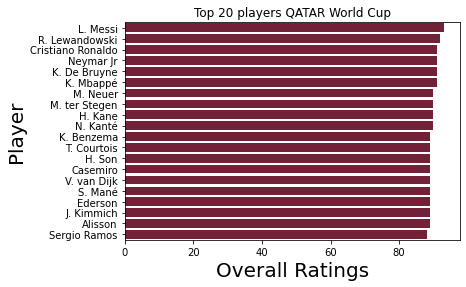

In [11]:
Overall = FIFA22["overall"]
footballer_name = FIFA22["short_name"]

x = FIFA22['short_name'].head(20) 
y = FIFA22['overall'].head(20)

# plot

ax= sns.barplot(x=y, y=x, color="#7F1431", orient='h')
plt.xlabel('Overall Ratings', size=20) 
plt.ylabel('Player', size=20) 
plt.title('Top 20 players QATAR World Cup')

plt.show()

In [13]:
def get_best_squad(formation):
    FIFA22_copy = FIFA22.copy()
    store = []
    
    # iterate through all positions in the input formation and get players with highest overall respective to the position
    for i in formation:
        store.append([
            i,
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'] == i]['overall'].idxmax()]]['short_name'].to_string(index=False),
            FIFA22_copy[FIFA22_copy['Position'] == i]['overall'].max(),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'] == i]['overall'].idxmax()]]['age'].to_string(index=False),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'] == i]['overall'].idxmax()]]['club_name'].to_string(index=False),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'] == i]['overall'].idxmax()]]['value_eur'].to_string(index=False),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'] == i]['overall'].idxmax()]]['wage_eur'].to_string(index=False)
        ])
        FIFA22_copy.drop(FIFA22_copy[FIFA22_copy['Position'] == i]['overall'].idxmax(), 
                         inplace=True)
    # return store with only necessary columns
    return pd.DataFrame(np.array(store).reshape(11,7), 
                        columns = ['Position', 'short_name', 'overall', 'age', 'club_name', 'value_eur', 'wage_eur']).to_string(index = False)

In [14]:
# best 4 3 3 

In [15]:
squad_433 = ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CM', 'CAM', 'RW', 'ST', 'LW']
print ('4-3-3')
print (get_best_squad(squad_433))

4-3-3
Position          short_name overall age           club_name   value_eur wage_eur
      GK            M. Neuer      90  35   FC Bayern München  13500000.0  86000.0
      RB T. Alexander-Arnold      87  22           Liverpool 114000000.0 150000.0
      CB         V. van Dijk      89  29           Liverpool  86000000.0 230000.0
      CB        Sergio Ramos      88  35 Paris Saint-Germain  24000000.0 115000.0
      LB          Jordi Alba      86  32        FC Barcelona  47000000.0 200000.0
     CDM            N. Kanté      90  30             Chelsea 100000000.0 230000.0
      CM        K. De Bruyne      91  30     Manchester City 125500000.0 350000.0
     CAM     Bruno Fernandes      88  26   Manchester United 107500000.0 250000.0
      RW            L. Messi      93  34 Paris Saint-Germain  78000000.0 320000.0
      ST      R. Lewandowski      92  32   FC Bayern München 119500000.0 270000.0
      LW           Neymar Jr      91  29 Paris Saint-Germain 129000000.0 270000.0


In [ ]:
# 4 2 2 

In [16]:
squad_442 = ['GK', 'RB', 'CB', 'CB', 'LB', 'RM', 'CM', 'CM', 'LM', 'ST', 'ST']
print ('4-4-2')
print (get_best_squad(squad_442))

4-4-2
Position          short_name overall age           club_name   value_eur wage_eur
      GK            M. Neuer      90  35   FC Bayern München  13500000.0  86000.0
      RB T. Alexander-Arnold      87  22           Liverpool 114000000.0 150000.0
      CB         V. van Dijk      89  29           Liverpool  86000000.0 230000.0
      CB        Sergio Ramos      88  35 Paris Saint-Germain  24000000.0 115000.0
      LB          Jordi Alba      86  32        FC Barcelona  47000000.0 200000.0
      RM           J. Sancho      87  21   Manchester United 116500000.0 150000.0
      CM        K. De Bruyne      91  30     Manchester City 125500000.0 350000.0
      CM            T. Kroos      88  31      Real Madrid CF  75000000.0 310000.0
      LM              H. Son      89  28   Tottenham Hotspur 104000000.0 220000.0
      ST      R. Lewandowski      92  32   FC Bayern München 119500000.0 270000.0
      ST   Cristiano Ronaldo      91  36   Manchester United  45000000.0 270000.0


In [17]:
# 4 3 2 1 

In [18]:
squad_4231 = ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CDM', 'CAM', 'CAM', 'CAM', 'ST']
print ('4-2-3-1')
print (get_best_squad(squad_4231))

4-2-3-1
Position          short_name overall age           club_name   value_eur wage_eur
      GK            M. Neuer      90  35   FC Bayern München  13500000.0  86000.0
      RB T. Alexander-Arnold      87  22           Liverpool 114000000.0 150000.0
      CB         V. van Dijk      89  29           Liverpool  86000000.0 230000.0
      CB        Sergio Ramos      88  35 Paris Saint-Germain  24000000.0 115000.0
      LB          Jordi Alba      86  32        FC Barcelona  47000000.0 200000.0
     CDM            N. Kanté      90  30             Chelsea 100000000.0 230000.0
     CDM            Casemiro      89  29      Real Madrid CF  88000000.0 310000.0
     CAM     Bruno Fernandes      88  26   Manchester United 107500000.0 250000.0
     CAM           T. Müller      87  31   FC Bayern München  66000000.0 140000.0
     CAM      Bernardo Silva      86  26     Manchester City  80000000.0 200000.0
      ST      R. Lewandowski      92  32   FC Bayern München 119500000.0 270000.0


In [19]:
## Top 10 Promising Teams 2022 World Cup

In [20]:
def get_best_squad_n(formation, nationality, measurement = 'overall'):
    FIFA22_copy = FIFA22.copy()
    FIFA22_copy = FIFA22_copy[FIFA22_copy['nationality_name'] == nationality]
    store = []
    for i in formation:
        store.append([
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].idxmax()]]['Position'].to_string(index = False),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].idxmax()]]['short_name'].to_string(index = False), 
            FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].max(),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].idxmax()]]['age'].to_string(index = False),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].idxmax()]]['club_name'].to_string(index = False),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].idxmax()]]['value_eur'].to_string(index = False),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].idxmax()]]['wage_eur'].to_string(index = False)
        ])    
        FIFA22_copy.drop(FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].idxmax(),inplace = True)
    return np.mean([x[2] for x in store]).round(2), pd.DataFrame(np.array(store).reshape(11,7),columns = ['Position', 'short_name', measurement, 'age', 'club_name', 'value_eur', 'wage_eur']).to_string(index = False)

In [21]:
def get_summary_n(squad_list, squad_name, nationality_list):
    summary = []
    for i in nationality_list:
        count = 0
        for j in squad_list:
            try:
                # for overall rating
                O_temp_rating, _  = get_best_squad_n(formation = j, nationality = i, measurement = 'overall')
                # for potential rating & corresponding value
                P_temp_rating, _ = get_best_squad_n(formation = j, nationality = i, measurement = 'potential')
                summary.append([i, squad_name[count], O_temp_rating.round(2), P_temp_rating.round(2)])    
                count += 1
            except:
                count += 1  
    return summary

In [22]:
squad_343_strict = ['GK', 'CB', 'CB', 'CB', 'RB|RWB', 'CM|CDM', 'CM|CDM', 'LB|LWB', 'RM|RW', 'ST|CF', 'LM|LW']
squad_442_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'RM', 'CM|CDM', 'CM|CAM', 'LM', 'ST|CF', 'ST|CF']
squad_4312_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'CAM|CF', 'ST|CF', 'ST|CF']
squad_433_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'RM|RW', 'ST|CF', 'LM|LW']
squad_4231_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CDM', 'RM|RW', 'CAM', 'LM|LW', 'ST|CF']

In [23]:
squad_list = [squad_343_strict, squad_442_strict, squad_4312_strict, squad_433_strict, squad_4231_strict]
squad_name = ['3-4-3', '4-4-2', '4-3-1-2', '4-3-3', '4-2-3-1']

In [24]:
country = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, list_2022)).reshape(-1,4), columns = ['nationality_name', 'Squad', 'overall', 'potential'])
country.set_index('nationality_name', inplace = False)
country[['overall', 'potential']] = country[['overall', 'potential']].astype(float)

In [25]:
# Teams Dataset


In [85]:
Semi_Finals=['France','Argentina','Morocco','Croatia']


# FIFA22_S = FIFA22[["short_name", "age", "nationality_name", 'overall', 'potential', "club_name", "Position", "value_eur", "wage_eur"]]
FIFA22_S = country[(country["nationality_name"].apply(lambda x: x in Semi_Finals))]
FIFA22_S['nationality_name'].unique()
FIFA22_S

country_top4 = FIFA22_S.groupby('nationality_name').first().sort_values('potential',ascending=False)[0:10].reset_index()
country_top4


,nationality_name,Squad,overall,potential
0,France,3-4-3,85.55,89.18
1,Argentina,3-4-3,83.18,86.00
2,Croatia,3-4-3,79.55,84.09
3,Morocco,3-4-3,79.73,81.36


In [29]:
# visualization


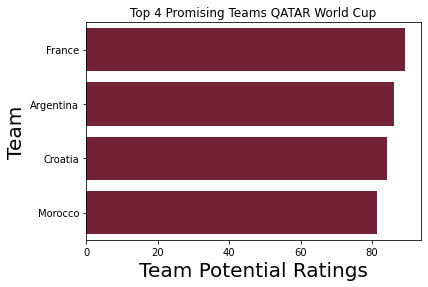

In [86]:
x = country_top4['nationality_name']
y = country_top4['potential']

# plot
ax= sns.barplot(x=y, y=x, color="#7F1431", orient='h')
plt.xlabel('Team Potential Ratings', size = 20) 
plt.ylabel('Team', size = 20 ) 
plt.title('Top 4 Promising Teams QATAR World Cup')

plt.show()

In [78]:
# Analysis of the best teams s s s s s 

In [104]:
France = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['France'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
France.set_index('Nationality', inplace = False)
France[['Overall', 'Potential']] = France[['Overall', 'Potential']].astype(float)
France

,Nationality,Squad,Overall,Potential
0,France,3-4-3,85.55,89.18
1,France,4-4-2,85.73,88.73
2,France,4-3-1-2,86.09,88.91
3,France,4-3-3,85.64,89.09
4,France,4-2-3-1,85.64,89.09


In [80]:
Argentina = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Argentina'])).reshape(-1,4), columns = ['nationality_name', 'Squad', 'overall', 'potential'])
Argentina.set_index('nationality_name', inplace = False)
Argentina[['overall', 'potential']] = Argentina[['overall', 'potential']].astype(float)
Argentina

,nationality_name,Squad,overall,potential
0,Argentina,3-4-3,83.18,86.00
1,Argentina,4-4-2,82.45,85.64
2,Argentina,4-3-1-2,83.36,85.91
3,Argentina,4-3-3,83.73,86.18
4,Argentina,4-2-3-1,83.73,86.09


In [99]:

Morocco = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Morocco'])).reshape(-1,4), columns = ['nationality_name', 'Squad', 'overall', 'potential'])
Morocco.set_index('nationality_name', inplace = False)
Morocco[['overall', 'potential']] = Morocco[['overall', 'potential']].astype(float)
Morocco

,nationality_name,Squad,overall,potential
0,Morocco,3-4-3,79.73,81.36
1,Morocco,4-4-2,78.45,81.00
2,Morocco,4-3-1-2,78.73,80.82
3,Morocco,4-3-3,79.55,81.45
4,Morocco,4-2-3-1,79.55,81.45


,nationality_name,Squad,overall,potential


In [ ]:
Croatia = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Croatia'])).reshape(-1,4), columns = ['nationality_name', 'Squad', 'overall', 'potential'])
Croatia.set_index('nationality_name', inplace = False)
Croatia[['overall', 'potential']] = Croatia[['overall', 'potential']].astype(float)
Croatia